## **Mô tả**
Bộ dữ liệu FoodPrice_in_Turkey chứa dữ liệu chứa dữ liệu về giá cả các mặt hàng thực phẩm tại Turkey, các thông tin được thống kê bao gồm:

Place	ProductId	ProductName	UmId	UmName	Month	Year	Price
+ Place: Nơi bán
+ ProductID: Mã sản phẩm
+ ProductName: Tên sản phẩm
+ UmId: Mã đơn vị đo lường
+ UmName: Tên đơn vị đo lường
+ Month: Tháng
+ Year: Năm
+ Price: Giá

Hãy đưa bộ dữ liệu vào phân tích và giải đáp các thắc mắc sau:

+ Bộ dữ liệu chứa bao nhiêu dòng, bao nhiêu cột
+ Thang đo tương ứng của các thuộc tính được lưu trữ
+ Giá trung bình của từng loại thực phẩm là bao nhiêu
+ Đề xuất những loại phân tích mà bạn muốn biết mà bộ dữ liệu này có thể cung cấp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fp = pd.read_csv('FoodPrice_in_Turkey.csv')

In [3]:
fp.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [4]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


- Bộ dữ liệu chứa 7381 dòng, 8 cột

Nhận diện thang đo cho từng biến quan sát

- Place, ProductName, UmName: có kiểu object –> norminal attribute
- Month, Year: là dữ liệu dạng số nguyên (int64) mô tả tháng, năm. Quan sát, những thuộc tính này chỉ dùng để định danh, phân biệt giữa tháng, năm khác nhau –> norminal attribute
- ProductId, UmId mặc dù có kiểu số (int64), nhưng các con số này chỉ có ý nghĩa phân biệt khách hàng này với khách hàng khác –> thuộc tính định danh
- Price: thuộc tính định lượng, thang đo ratio

### **Chỉnh sửa cấu trúc bộ dữ liệu**

In [8]:
# Đổi tên cột thuộc tính, inplace = True đổi tiếp trên dữ liệu gốc mà không phải tạo bản sao
fp.rename(columns={"Place": "Địa điểm", "ProductName": "Tên SP"},inplace=True)
fp.head()

,Địa điểm,ProductId,Tên SP,UmId,UmName,Month,Year,Price,Giảm giá
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920,10%
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786,10%
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865,10%
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337,10%
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099,10%


In [9]:
# Thêm cột giảm giá 10% cho tất cả các bản ghi
fp['Giảm giá'] = '10%'
fp.head()

,Địa điểm,ProductId,Tên SP,UmId,UmName,Month,Year,Price,Giảm giá
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920,10%
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786,10%
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865,10%
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337,10%
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099,10%


In [10]:
fp['Giảm giá'].dtypes

dtype('O')

In [ ]:
pd.DataFrame

### **Giá trung bình của từng loại thực phẩm là bao nhiêu**

In [ ]:
# Hint: sử dụng groupby và mean để tính giá trung bình của từng loại thực phẩm
mean_productname = fp.groupby('ProductName').mean().sort_values(['Price', 'UmId'], ascending = False)
mean_productname[['Price', 'UmId']].head(10)

## **Sử dụng thư viện Seaborn để vẽ một số biểu đồ**

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
fp = pd.read_csv('FoodPrice_in_Turkey.csv')

In [4]:
fp.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [7]:
fp.isna().sum()

Place          0
ProductId      0
ProductName    0
UmId           0
UmName         0
Month          0
Year           0
Price          0
dtype: int64

### **Vẽ biểu đồ xu hướng**

In [9]:
fp.ProductName.value_counts().head()

Rice - Retail                  174
Onions - Retail                174
Milk (pasteurized) - Retail    174
Meat (veal) - Retail           174
Fish (fresh) - Retail          174
Name: ProductName, dtype: int64

In [ ]:
# Vẽ biểu đồ xu hướng giá gạo qua các năm

In [10]:
rice_fp = fp[fp.ProductName == 'Rice - Retail']
rice_fp

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
5829,Izmir,52,Rice - Retail,5,KG,8,2019,10.3386
5830,Izmir,52,Rice - Retail,5,KG,9,2019,10.4043
5831,Izmir,52,Rice - Retail,5,KG,10,2019,10.1955
5832,Izmir,52,Rice - Retail,5,KG,11,2019,10.2719


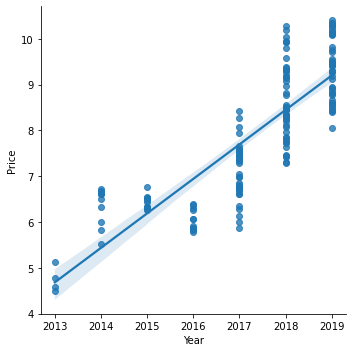

In [11]:
sns.lmplot(x='Year', y='Price', data=rice_fp)

**Nhận xét:**
+ Có thể thấy rằng giá gạo tăng dần qua các năm

In [12]:
trans_fp = fp[(fp.ProductName == 'Transport (public) - Retail') | (fp.ProductName == 'Rice - Retail')]
trans_fp

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
6757,Izmir,304,Transport (public) - Retail,55,Course,8,2019,3.1637
6758,Izmir,304,Transport (public) - Retail,55,Course,9,2019,3.1637
6759,Izmir,304,Transport (public) - Retail,55,Course,10,2019,3.1637
6760,Izmir,304,Transport (public) - Retail,55,Course,11,2019,3.6964


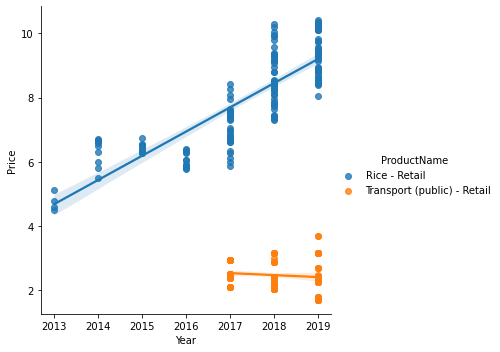

In [13]:
sns.lmplot(x='Year', y='Price', hue='ProductName', data=trans_fp)

**Nhận xét:**
- Có thể thấy rằng dù chi phí vận chuyển có xu hướng giảm, tuy nhiên giá gạo vẫn tăng khá mạnh, chứng tỏ không có sự liên quan giữa 2 thuộc tính này

### **Vẽ biểu đồ phân bố**

In [14]:
# Biểu đồ phân bố cho giá sản phẩm

<AxesSubplot:ylabel='Price'>

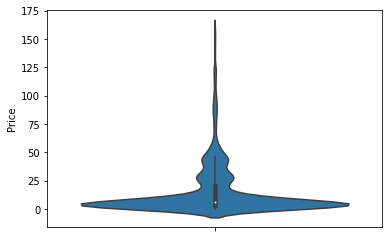

In [15]:
sns.violinplot(y='Price', data=fp)

**Nhận xét:**
- Có thể nhận thấy dữ liệu phân bố không được đều; 
- Nhiều sản phẩm giá thấp và ít sản phẩm giá cao.    

In [ ]:
# Biểu đồ phân bố cho năm của sản phẩm

<AxesSubplot:ylabel='Year'>

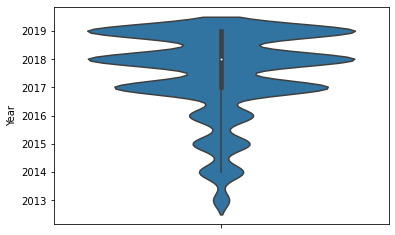

In [17]:
sns.violinplot(y='Year',data=fp)

**Nhận xét:**
+ Có thể thấy rằng sản phẩm chủ yếu thuộc những năm gần đây, những năm càng xa thì số lượng càng ít

### **Vẽ biểu đồ tần số**

In [ ]:
# Vẽ biểu đồ tần số cho các sản phẩm theo năm

<AxesSubplot:xlabel='Year', ylabel='count'>

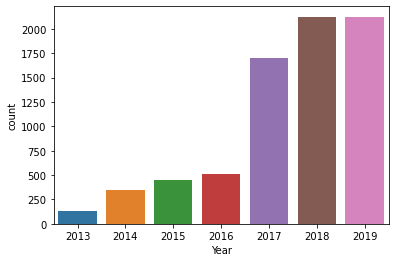

In [18]:
sns.countplot(x='Year', data=fp)

**Nhận xét:**
+ Những năm càng xa thì càng ít sản phẩm

In [ ]:
# Vẽ biểu đồ thống kê sản phẩm theo địa điểm

<AxesSubplot:xlabel='Place', ylabel='count'>

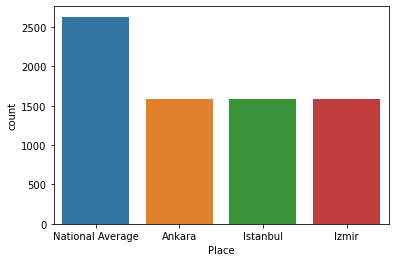

In [19]:
sns.countplot(x='Place', data=fp)

In [ ]:
# Hiển thị số lượng sản phẩm theo năm được nhóm theo địa điểm

<AxesSubplot:xlabel='Year', ylabel='count'>

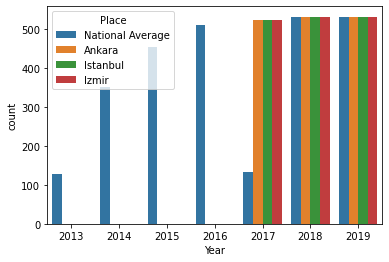

In [20]:
sns.countplot(x='Year', hue='Place',data=fp)

**Nhận xét:**
+ Có thể thấy rằng các năm 2013-2016 chỉ có dữ liệu cho sản phẩm ở National Avarage

### **Vẽ biểu đồ box plot**

In [ ]:
# Vẽ biểu đồ box plot cho thuộc tính giá sản phẩm

<AxesSubplot:xlabel='Price'>

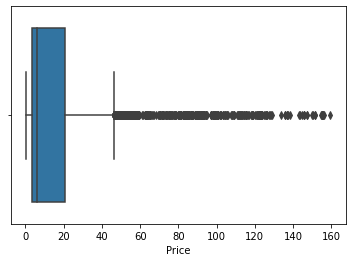

In [21]:
sns.boxplot(x=fp.Price)

**Nhận xét:**
+ Giá sản phẩm phân bố rất không đồng đều, tập trung ở giá thấp

In [ ]:
# Vẽ biểu đồ box plot giá sản phẩm phân bố theo năm

<AxesSubplot:xlabel='Year', ylabel='Price'>

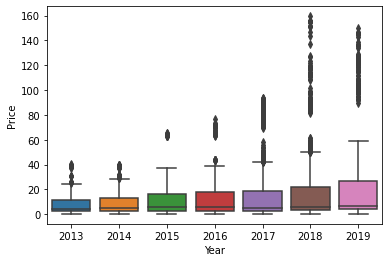

In [22]:
sns.boxplot(x='Year', y='Price', data=fp)

**Nhận xét:**
+ Giá sản phẩm phân bố rất không đồng đều, có tăng qua từng năm nhưng vẫn tập trung ở giá thấp